In [173]:
import pandas as pd

df = pd.read_csv("n_movies.csv")
df_copy = df

print(df.head())
print(df.columns)
print(df.description)

                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                         

Handle data duplicates

In [174]:
print("Rows before removing duplicates:", df.shape[0])
df = df.drop_duplicates(subset=['title','year'], keep='first')
print("Rows after removing duplicates:", df.shape[0])

Rows before removing duplicates: 9957
Rows after removing duplicates: 8040


Identify missing data from dataset

In [175]:
print(df.isnull().sum())
(df.isnull().sum() / len(df)) * 100


title             0
year            524
certificate    3240
duration       1500
genre            72
rating         1080
description       0
stars             0
votes          1080
dtype: int64


title           0.000000
year            6.517413
certificate    40.298507
duration       18.656716
genre           0.895522
rating         13.432836
description     0.000000
stars           0.000000
votes          13.432836
dtype: float64

Cleaning Data based on percentage missing:
year (6%) = drop
genre (0.8%) = drop
certicate (40%)
rating
duration 
votes
                   = replace w UNKNOWN

In [176]:
df = df.dropna(subset=['year'])
df = df.dropna(subset=['genre'])
df['certificate'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['votes'].fillna('Unknown', inplace=True)


print(df.isnull().sum())


title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64


Fixing 'year' column into start yr and end yr :)

In [177]:
import numpy as np

# Remove parentheses
df['year_clean'] = df['year'].str.replace(r'[\(\)]', '', regex=True)

# Split on dash
df[['start_year', 'end_year']] = df['year_clean'].str.split('–', expand=True)

# Convert to numeric, errors='coerce' will make invalid/missing values NaN
df['start_year'] = pd.to_numeric(df['start_year'], errors='coerce')
df['end_year'] = pd.to_numeric(df['end_year'], errors='coerce')

In [178]:
df['start_year'].value_counts()


2020.0    729
2021.0    694
2019.0    685
2018.0    678
2022.0    629
         ... 
1934.0      1
1944.0      1
1959.0      1
1938.0      1
1933.0      1
Name: start_year, Length: 86, dtype: int64

In [179]:
df['end_year'].value_counts()


2019.0    105
2020.0    101
2018.0     92
2021.0     87
2022.0     66
2017.0     63
2016.0     37
2014.0     29
2015.0     28
2013.0     22
2012.0     16
2000.0      8
2010.0      8
2011.0      8
2009.0      6
2023.0      6
2002.0      5
1999.0      5
1996.0      5
2006.0      4
2007.0      4
2008.0      4
2005.0      4
2004.0      4
2001.0      3
1989.0      2
1998.0      2
1995.0      2
1974.0      1
1979.0      1
1993.0      1
2003.0      1
1991.0      1
1969.0      1
1994.0      1
1997.0      1
Name: end_year, dtype: int64

In [180]:
print(df.head())


                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre rating  \
0         Action, Comedy, Drama    8.5   
1     Biography, Drama, History    8.7   
2                  Crime, Drama    8.9   
3        Drama, Horror, Mystery    5.9   
4  Animation, Action, Adventure    8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                               

Dropped all irrelevant columns

In [181]:
df = df.drop(columns=['year', 'year_clean', 'description','stars'])
print(df.head())



                    title certificate duration                         genre  \
0               Cobra Kai       TV-14   30 min         Action, Comedy, Drama   
1               The Crown       TV-MA   58 min     Biography, Drama, History   
2        Better Call Saul       TV-MA   46 min                  Crime, Drama   
3           Devil in Ohio       TV-MA  356 min        Drama, Horror, Mystery   
4  Cyberpunk: Edgerunners       TV-MA   24 min  Animation, Action, Adventure   

  rating    votes  start_year  end_year  
0    8.5  177,031      2018.0       NaN  
1    8.7  199,885      2016.0       NaN  
2    8.9  501,384      2015.0    2022.0  
3    5.9    9,773      2022.0       NaN  
4    8.6   15,413      2022.0       NaN  


Exploring the average rating by decade to identify how movie quality changed over time.

In [182]:
# Conversions to corrrect types:
#title
#certificate
#duration
#genre
#votes
#start_year
#end_year


df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['start_year'] = pd.to_numeric(df['start_year'], errors = 'coerce')
df['end_year'] = pd.to_numeric(df['end_year'], errors = 'coerce')


df['start_year'].head()



0    2018.0
1    2016.0
2    2015.0
3    2022.0
4    2022.0
Name: start_year, dtype: float64

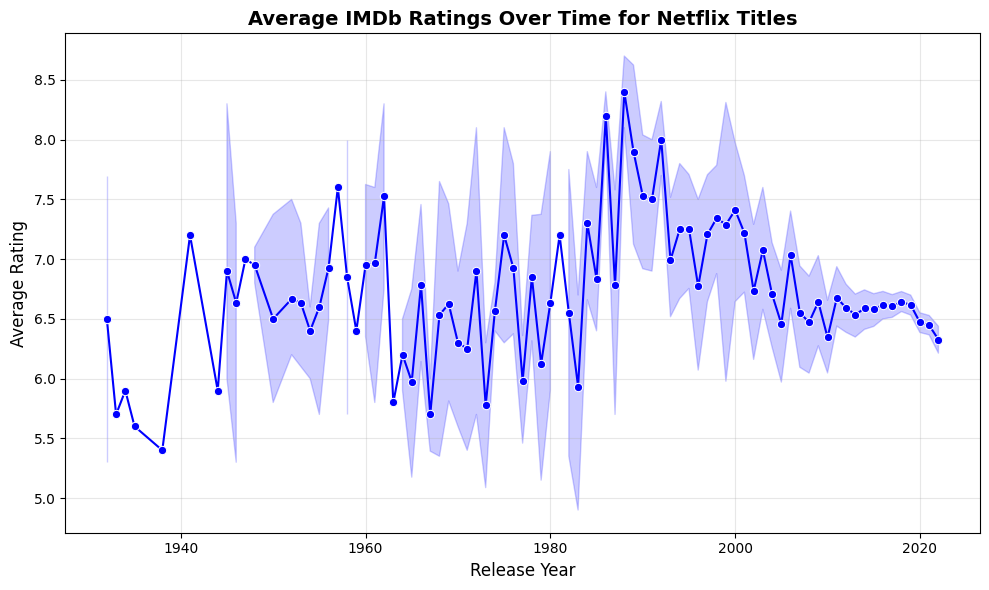

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data= df, x = 'start_year', y = 'rating', marker = 'o',color = 'blue')
plt.title('Average IMDb Ratings Over Time for Netflix Titles', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



<AxesSubplot: xlabel='start_year', ylabel='rating'>

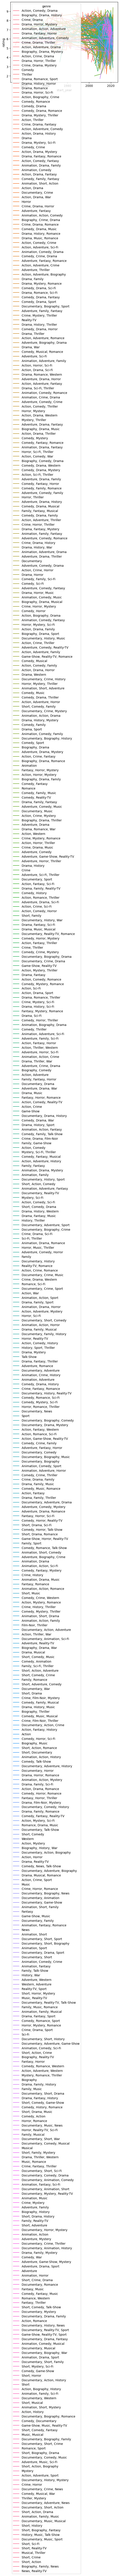

In [184]:
df_genre_year = df.groupby(['start_year', 'genre'])['rating'].mean().reset_index()
sns.lineplot(data = df, x = 'start_year', y = 'rating', hue = 'genre')


The genre plotting resulted in very messy outcome due to muti-genre media and hence dealt with this below:

<AxesSubplot: xlabel='start_year', ylabel='rating'>

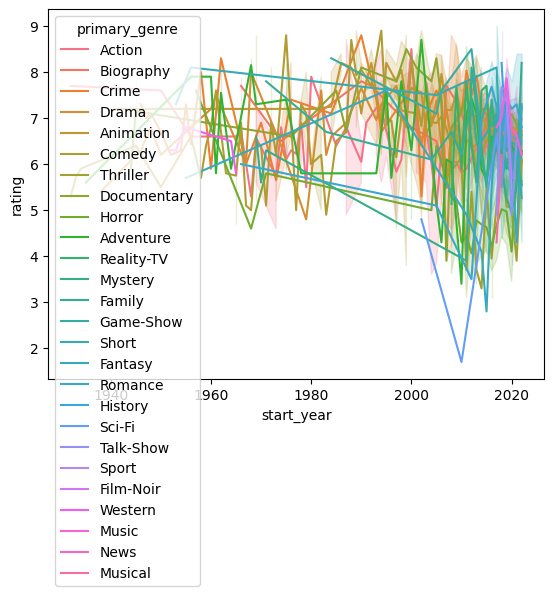

In [185]:
# Decided to keep only the first listed genre from the media list to make analysis cleaner and more readable:

df['primary_genre'] = df['genre'].str.split(',').str[0].str.strip()
df_genre_year = df.groupby(['start_year', 'primary_genre'])['rating'].mean().reset_index()
sns.lineplot(data = df, x = 'start_year', y = 'rating', hue = 'primary_genre')


^ Better but still looks like madness, decided to filter this further so only the 6 most common genres are plotted. 

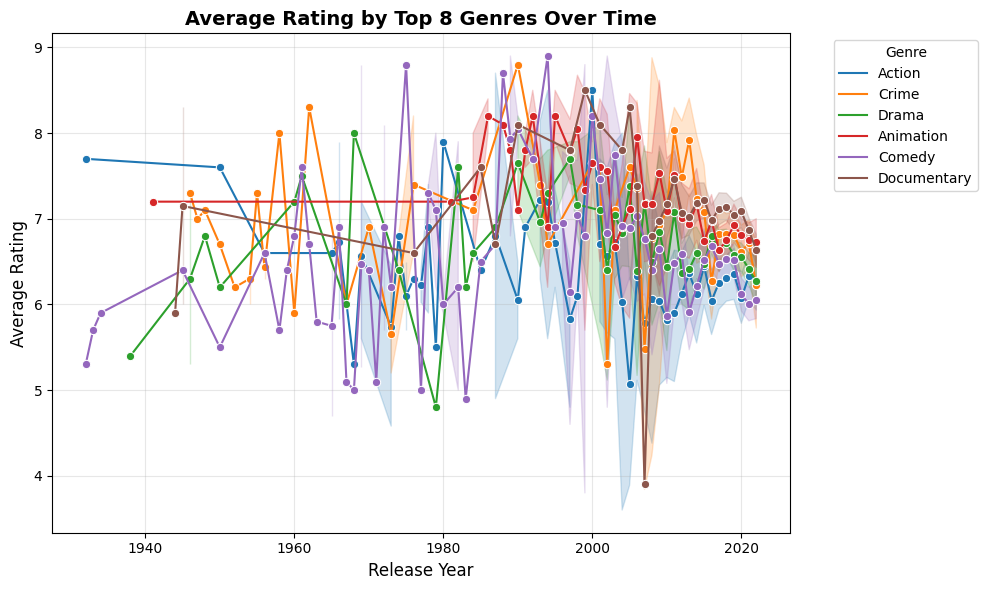

In [186]:
top_genres = df['primary_genre'].value_counts().nlargest(6).index
df_top= df[df['primary_genre'].isin(top_genres)]

#now to plot it:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_top, x='start_year', y='rating', hue='primary_genre', marker='o')
plt.title('Average Rating by Top 8 Genres Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [187]:
df.loc[df['genre'].str.lower() == 'comedy', 'rating'].mean()


6.301596516690856

In [188]:
df.loc[df['genre'].str.lower() == 'crime', 'rating'].mean()

6.3533333333333335

In [189]:
df.loc[df['genre'].str.lower() == 'animation', 'rating'].mean()

6.570454545454546

In [190]:
df.loc[df['genre'].str.lower() == 'drama', 'rating'].mean()

6.553589743589744

Decided to make a decade column so that I can analyse the data more efficently.

I can then plot and compare this

In [191]:
#Dropped the media without a start year for acuurate analysis:
df['start_year'].dropna()

#
df['decade'] = (df['start_year'] // 10) * 10
df['decade'].head()

0    2010.0
1    2010.0
2    2010.0
3    2020.0
4    2020.0
Name: decade, dtype: float64

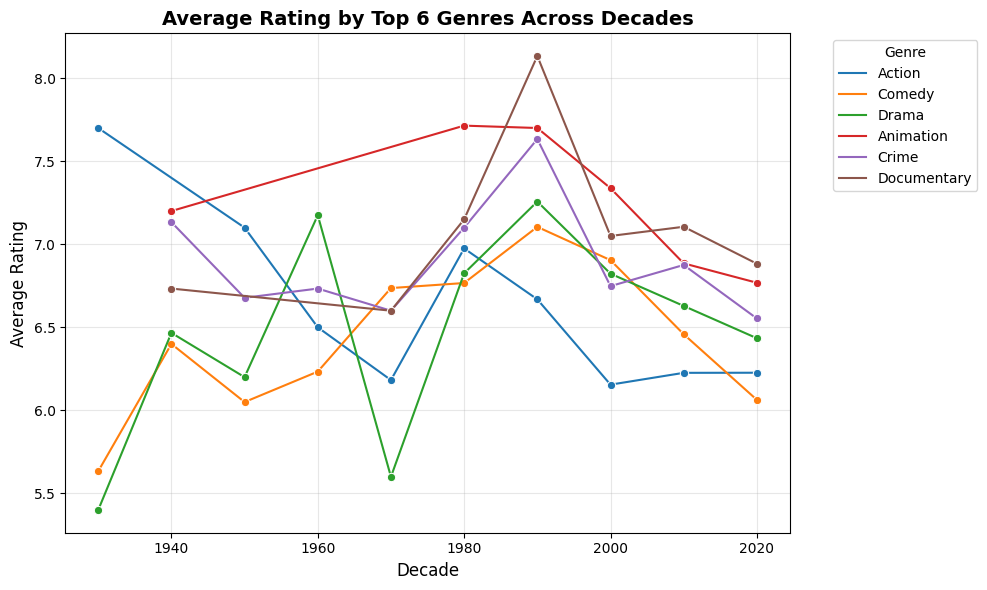

In [192]:
top_genres = df['primary_genre'].value_counts().nlargest(6).index
df_top=df[df['primary_genre'].isin(top_genres)]

df_decade_top = (
    df_top.groupby(['decade', 'primary_genre'])['rating']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
            data=df_decade_top,
            x='decade',
            y='rating',
            hue='primary_genre',
            marker = 'o'
)


plt.title('Average Rating by Top 6 Genres Across Decades', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [206]:
decade_avg = df.groupby('decade')['rating'].mean().reset_index()


print(decade_avg)
print(df['documentary'].mean())

   decade    rating
0  1930.0  5.933333
1  1940.0  6.781818
2  1950.0  6.707407
3  1960.0  6.611905
4  1970.0  6.444444
5  1980.0  7.087500
6  1990.0  7.271875
7  2000.0  6.730864
8  2010.0  6.602476
9  2020.0  6.425108


TypeError: 'DataFrame' object is not callable

In [204]:
top_genres = df['primary_genre'].value_counts().nlargest(6).index
df_top= df[df['primary_genre'].isin(top_genres)]
genre_avg = df_top.groupby('genre')['rating'].mean().reset_index()

print(genre_avg)

                            genre    rating
0                          Action  5.261905
1               Action, Adventure  6.800000
2    Action, Adventure, Biography  7.000000
3       Action, Adventure, Comedy  6.026000
4        Action, Adventure, Crime  5.982759
..                            ...       ...
381               Drama, Thriller  6.187342
382          Drama, Thriller, War  7.000000
383      Drama, Thriller, Western  6.300000
384                    Drama, War  7.200000
385                Drama, Western  6.650000

[386 rows x 2 columns]


In [207]:
df.loc[df['genre'].str.lower() == 'documentary', 'rating'].mean()

7.018337408312958

In [208]:
df.loc[df['genre'].str.lower() == 'animation', 'rating'].mean()

6.570454545454546

In [219]:
# TOP 10 MEDIA PER DECADE
top_per_decade = df.sort_values('rating', ascending=False).groupby('decade').head(3)
df['primary_genre'] = df['genre'].str.split(',').str[0].str.strip()

print(top_per_decade[['title','decade',  'rating', 'primary_genre']])


                                 title  decade  rating primary_genre
17                                1899  2020.0     9.6         Drama
7                         Breaking Bad  2000.0     9.5         Crime
3322   Elesin Oba: The King's Horseman  2020.0     9.4     Adventure
4826       Story Time Book: Read-Along  2020.0     9.4     Animation
193         Avatar: The Last Airbender  2000.0     9.3     Animation
793        Cosmos: A Spacetime Odyssey  2010.0     9.3   Documentary
1406                        Our Planet  2010.0     9.3   Documentary
1209                        Reply 1988  2010.0     9.2        Comedy
299   Fullmetal Alchemist: Brotherhood  2000.0     9.1     Animation
444                       Cowboy Bebop  1990.0     8.9     Animation
37                            Seinfeld  1980.0     8.9        Comedy
26                             Friends  1990.0     8.9        Comedy
1286      Monty Python's Flying Circus  1960.0     8.8        Comedy
191                         Twin P